In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier



import warnings
warnings.filterwarnings('ignore')



In [51]:
df=pd.read_csv("cardio_train.csv", delimiter=";")

In [52]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [53]:
df.shape

(69301, 13)

In [54]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [56]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [57]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [58]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df.cardio.unique()

array([0, 1], dtype=int64)

In [60]:
df['years'] = ( df['age'] / 365).round(0)
df["years"] = pd.to_numeric(df["years"],downcast='integer')

In [61]:
dfcor=df.corr()
dfcor

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269,0.003247
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095,0.999089
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592,-0.023360
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015,-0.081233
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094,0.054366
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211,0.020691
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290,0.017823
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752,0.154297
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062,0.098985
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225,-0.047936


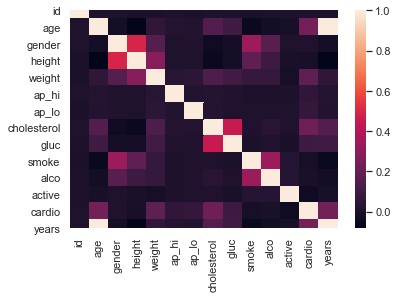

In [62]:
sns.heatmap(dfcor)

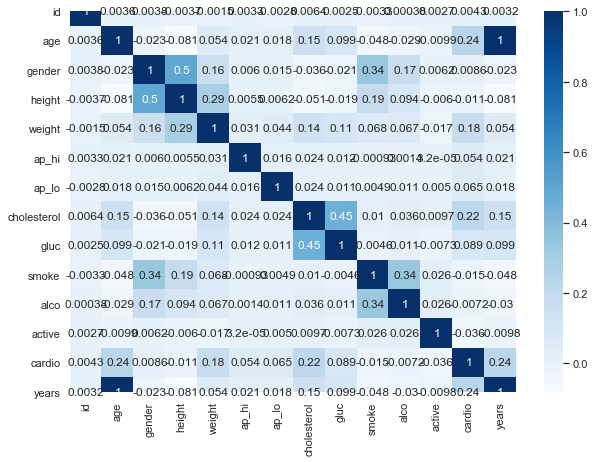

In [63]:
plt.figure(figsize=(10,7))
sns.heatmap(dfcor,cmap= "Blues",annot=True)

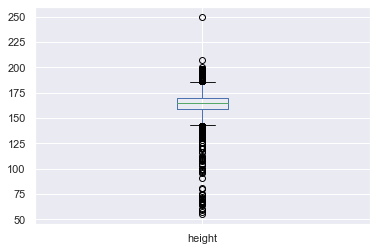

In [64]:
df["height"].plot.box()

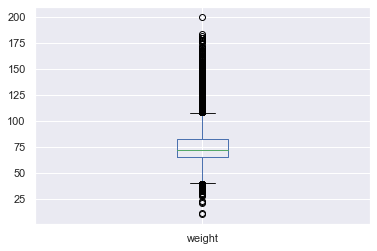

In [65]:
df["weight"].plot.box()

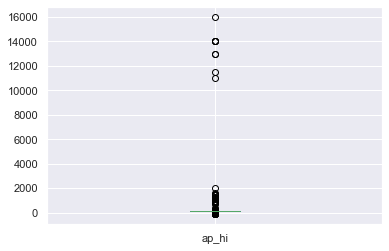

In [66]:
df["ap_hi"].plot.box()

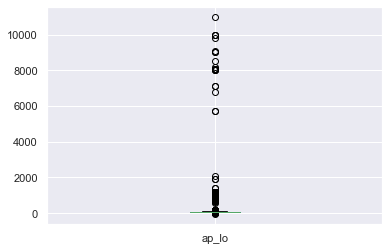

In [67]:
df["ap_lo"].plot.box()

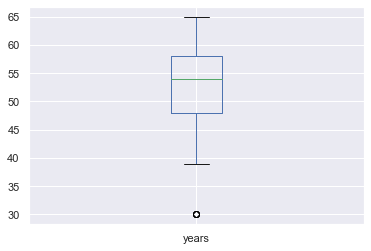

In [68]:
df["years"].plot.box()

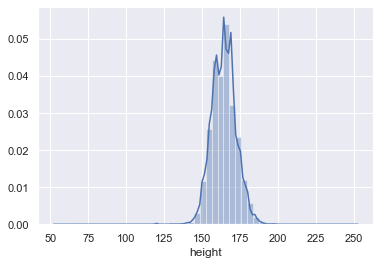

In [69]:
sns.distplot(df['height'])

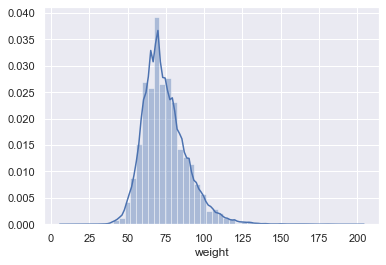

In [70]:
sns.distplot(df['weight'])

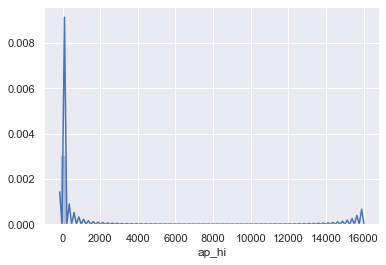

In [71]:
sns.distplot(df['ap_hi'])

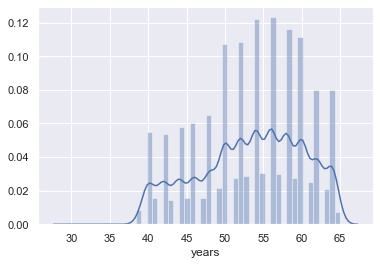

In [72]:
sns.distplot(df['years'])

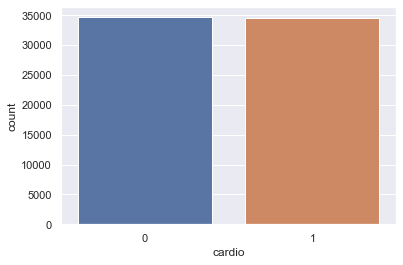

In [73]:
sns.countplot(df['cardio'])

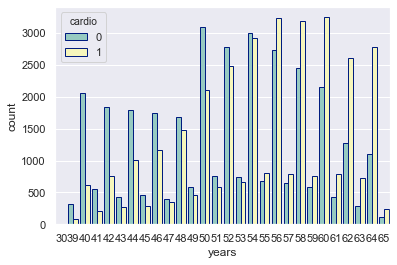

In [74]:
sns.countplot(x='years', hue='cardio', data = df, palette="Set3", edgecolor=sns.color_palette("dark", n_colors = 1));

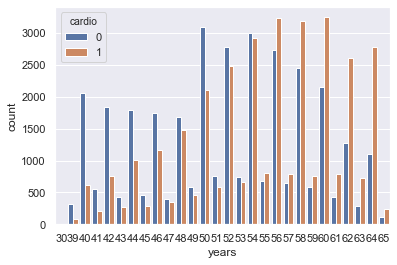

In [75]:
sns.set(style="darkgrid")
ax = sns.countplot(x="years",hue="cardio", data=df)

In [76]:
df=df.drop('id', axis=1)

In [77]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,53.338177
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,6.765427
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [78]:
df=df.drop("years",axis=1)

In [79]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
x=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state = 1)

In [82]:
x_train.shape

(55440, 11)

In [83]:
y_train.shape

(55440,)

In [84]:
x_test.shape

(13861, 11)

In [85]:
y_test.shape

(13861,)

In [86]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train= scale.fit_transform(x_train)
x_test= scale.transform(x_test)

In [87]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
print(svc.score)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

<bound method ClassifierMixin.score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)>
0.7329918476300411
[[5289 1659]
 [2042 4871]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6948
           1       0.75      0.70      0.72      6913

    accuracy                           0.73     13861
   macro avg       0.73      0.73      0.73     13861
weighted avg       0.73      0.73      0.73     13861



In [89]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(x_train, y_train)
model=forest
model.score(x_train, y_train)

0.9799422799422799

In [94]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.5911550393189524
[[6205  743]
 [4924 1989]]
              precision    recall  f1-score   support

           0       0.56      0.89      0.69      6948
           1       0.73      0.29      0.41      6913

    accuracy                           0.59     13861
   macro avg       0.64      0.59      0.55     13861
weighted avg       0.64      0.59      0.55     13861



In [95]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6383377822667917
[[4382 2566]
 [2447 4466]]
              precision    recall  f1-score   support

           0       0.64      0.63      0.64      6948
           1       0.64      0.65      0.64      6913

    accuracy                           0.64     13861
   macro avg       0.64      0.64      0.64     13861
weighted avg       0.64      0.64      0.64     13861



In [96]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6469951662939182
[[4510 2438]
 [2455 4458]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      6948
           1       0.65      0.64      0.65      6913

    accuracy                           0.65     13861
   macro avg       0.65      0.65      0.65     13861
weighted avg       0.65      0.65      0.65     13861



In [97]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.726570954476589
[[5637 1311]
 [2479 4434]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      6948
           1       0.77      0.64      0.70      6913

    accuracy                           0.73     13861
   macro avg       0.73      0.73      0.72     13861
weighted avg       0.73      0.73      0.72     13861



In [98]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6913642594329413
[[5774 1174]
 [3104 3809]]
              precision    recall  f1-score   support

           0       0.65      0.83      0.73      6948
           1       0.76      0.55      0.64      6913

    accuracy                           0.69     13861
   macro avg       0.71      0.69      0.69     13861
weighted avg       0.71      0.69      0.69     13861



In [99]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.6411514320756079
[[4423 2525]
 [2449 4464]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      6948
           1       0.64      0.65      0.64      6913

    accuracy                           0.64     13861
   macro avg       0.64      0.64      0.64     13861
weighted avg       0.64      0.64      0.64     13861

